In [1]:
import time
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader.data as pd_dr
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importar biblioteca Yahoo Finance.
import yfinance as yf
yf.pdr_override()

In [3]:
# Ativos analisados: Índice Bovespa, Petrobras, Itaú, BB, Bradesco, Dólar.
v_ativos = ['^BVSP', 'PETR4.SA', 'ITUB4.SA', 'BBAS3.SA', 'BBDC4.SA', 'USDBRL=X']
v_ano = '2023'

v_dt_inicio = str(v_ano)+'-01-01'
v_dt_fim = str(v_ano)+'-12-31'

In [4]:
# Obtendo cotações (importando dados).
df_cotacoes = pd_dr.get_data_yahoo(v_ativos, start = v_dt_inicio, end = v_dt_fim)
df_cotacoes_petro = pd_dr.get_data_yahoo(v_ativos[1], start = v_dt_inicio, end = v_dt_fim)
df_cotacoes_itau = pd_dr.get_data_yahoo(v_ativos[2], start = v_dt_inicio, end = v_dt_fim)
df_cotacoes_bb = pd_dr.get_data_yahoo(v_ativos[3], start = v_dt_inicio, end = v_dt_fim)
df_cotacoes_bradesco = pd_dr.get_data_yahoo(v_ativos[4], start = v_dt_inicio, end = v_dt_fim)
df_cotacoes

[*********************100%%**********************]  6 of 6 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Adj Close                                                       \
             BBAS3.SA   BBDC4.SA   ITUB4.SA   PETR4.SA  USDBRL=X     ^BVSP   
Date                                                                         
2023-01-02  30.951462  13.827188  23.614153  18.442509  5.285500  106376.0   
2023-01-03  30.374498  13.141015  23.122387  17.975815  5.360131  104166.0   
2023-01-04  30.765348  13.178561  23.189888  18.547112  5.478500  105334.0   
2023-01-05  32.170536  13.751134  23.913065  19.214970  5.430100  107518.0   
2023-01-06  32.617226  14.135980  24.327684  19.102320  5.349800  108836.0   
...               ...        ...        ...        ...       ...       ...   
2023-10-24  49.040001  14.180000  26.990000  35.880001  5.012300  113762.0   
2023-10-25  49.049999  14.140000  27.040001  36.070000  4.991000  112830.0   
2023-10-26  50.070000  14.500000  27.709999  35.700001  4.994700  114777.0   
2023-10-27  48.799999  14.350000  27.299999  35.439999  4.985300  113301.0   
2023-10-28        NaN        NaN        NaN        NaN  5.015200       NaN   

                Close                                 ...       Open  \
             BBAS3.SA BBDC4.SA   ITUB4.SA   PETR4.SA  ...   ITUB4.SA   
Date                                                  ...              
2023-01-02  33.259998    14.75  24.490000  22.920000  ...  24.430000   
2023-01-03  32.639999    14.00  23.980000  22.340000  ...  24.490000   
2023-01-04  33.060001    14.04  24.049999  23.049999  ...  24.059999   
2023-01-05  34.570000    14.65  24.799999  23.879999  ...  24.100000   
2023-01-06  35.049999    15.06  25.230000  23.740000  ...  24.930000   
...               ...      ...        ...        ...  ...        ...   
2023-10-24  49.040001    14.18  26.990000  35.880001  ...  27.250000   
2023-10-25  49.049999    14.14  27.040001  36.070000  ...  27.049999   
2023-10-26  50.070000    14.50  27.709999  35.700001  ...  27.200001   
2023-10-27  48.799999    14.35  27.299999  35.439999  ...  27.840000   
2023-10-28        NaN      NaN        NaN        NaN  ...        NaN   

                                               Volume               \
             PETR4.SA  USDBRL=X     ^BVSP    BBAS3.SA     BBDC4.SA   
Date                                                                 
2023-01-02  23.540001  5.285500  109734.0  11778500.0   24748300.0   
2023-01-03  22.940001  5.360131  106377.0  10773700.0  127764400.0   
2023-01-04  21.959999  5.478500  104167.0   9759500.0  153235200.0   
2023-01-05  23.340000  5.430100  105336.0  16968800.0  164949200.0   
2023-01-06  23.940001  5.349800  107642.0  14752300.0   86788300.0   
...               ...       ...       ...         ...          ...   
2023-10-24  35.650002  5.012300  112814.0   8526500.0   35238200.0   
2023-10-25  36.080002  4.991000  113762.0   6312600.0   44133500.0   
2023-10-26  35.849998  4.994700  112840.0   9788800.0   52455700.0   
2023-10-27  36.209999  4.985300  114777.0  10168900.0   43153700.0   
2023-10-28        NaN  5.015200       NaN         NaN          NaN   

                                                          
              ITUB4.SA     PETR4.SA USDBRL=X       ^BVSP  
Date                                                      
2023-01-02  23340700.0   78424700.0        0   8130500.0  
2023-01-03  29873800.0   96750300.0        0  14466700.0  
2023-01-04  29881500.0  129504000.0        0  14451200.0  
2023-01-05  36322800.0   73886000.0        0  15512000.0  
2023-01-06  37628200.0   51851500.0        0  12626600.0  
...                ...          ...      ...         ...  
2023-10-24  15850100.0   78634900.0        0  10711800.0  
2023-10-25  25565100.0   32846500.0        0  12306500.0  
2023-10-26  28766600.0   47858600.0        0  12770600.0  
2023-10-27  30176000.0   45843100.0        0  12289500.0  
2023-10-28         NaN          NaN        0         NaN  

[216 rows x 36 columns]

In [5]:
# Excluindo colunas
df_cotacoes_petro.drop(columns=['Open','Adj Close','Low','Volume','High'],inplace=True)
df_cotacoes_itau.drop(columns=['Open','Adj Close','Low','Volume','High'],inplace=True)
df_cotacoes_bb.drop(columns=['Open','Adj Close','Low','Volume','High'],inplace=True)
df_cotacoes_bradesco.drop(columns=['Open','Adj Close','Low','Volume','High'],inplace=True)
df_cotacoes_petro



,Close
Date,
2023-01-02,22.920000
2023-01-03,22.340000
2023-01-04,23.049999
2023-01-05,23.879999
2023-01-06,23.740000
...,...
2023-10-23,35.349998
2023-10-24,35.880001
2023-10-25,36.070000


In [6]:
df_cotacoes_petro.dtypes


Close    float64
dtype: object

In [7]:
# Removendo valores nulos.
df_cotacoes_petro = df_cotacoes_petro.loc[df_cotacoes_petro.Close.notnull()]
df_cotacoes_itau = df_cotacoes_itau.loc[df_cotacoes_itau.Close.notnull()]
df_cotacoes_bb = df_cotacoes_bb.loc[df_cotacoes_bb.Close.notnull()]
df_cotacoes_bradesco = df_cotacoes_bradesco.loc[df_cotacoes_bradesco.Close.notnull()]
df_cotacoes_itau

,Close
Date,
2023-01-02,24.490000
2023-01-03,23.980000
2023-01-04,24.049999
2023-01-05,24.799999
2023-01-06,25.230000
...,...
2023-10-23,26.990000
2023-10-24,26.990000
2023-10-25,27.040001


Text(0.5, 1.0, 'Análise de Tendência')

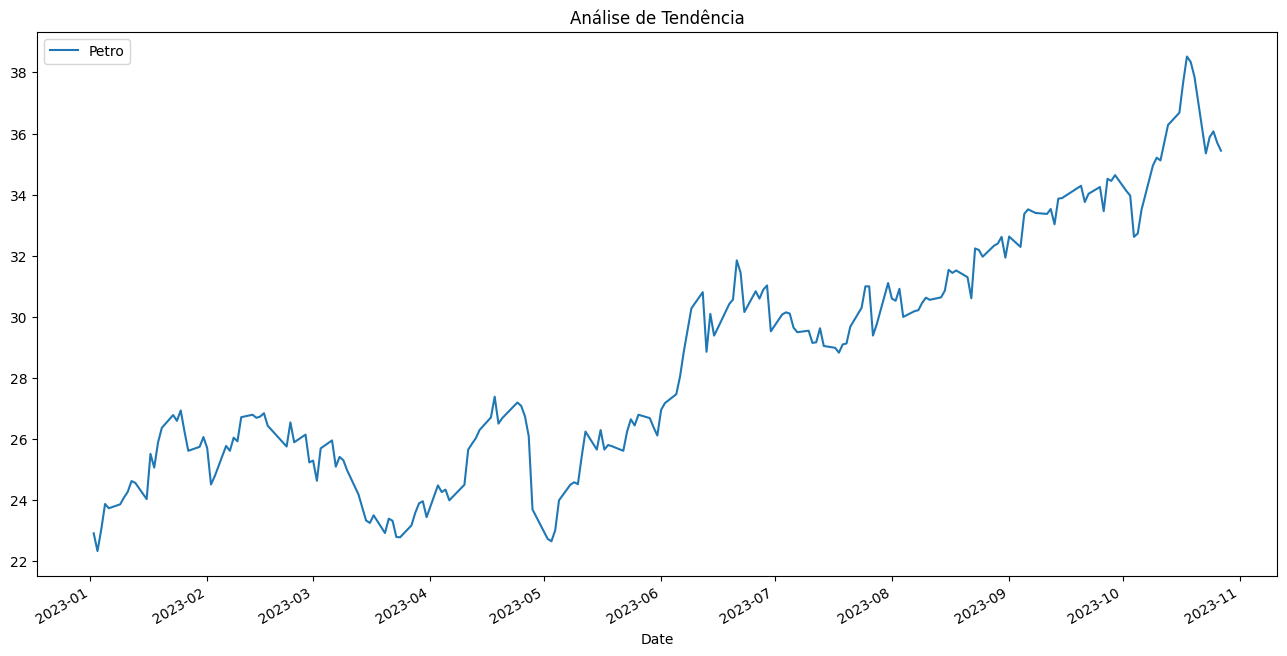

In [8]:
# Analisando a tendência.

# Gerando o gráfico.
df_cotacoes_petro['Close'].plot(legend=True, label='Petro', figsize = (16, 8))

plt.title("Análise de Tendência")

Text(0.5, 1.0, 'Análise de Tendência')

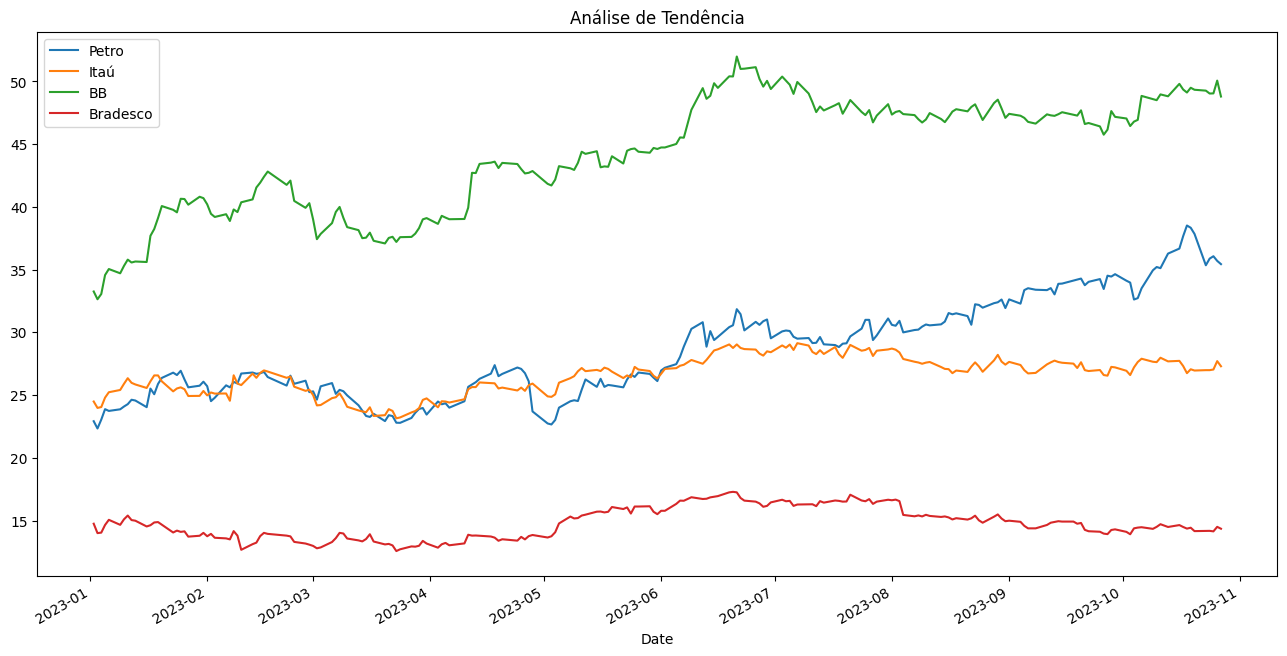

In [9]:
# Gerando o gráfico para os outros ativos.
df_cotacoes_petro['Close'].plot(legend=True, label='Petro', figsize = (16, 8))
df_cotacoes_itau['Close'].plot(legend=True, label='Itaú', figsize = (16, 8))
df_cotacoes_bb['Close'].plot(legend=True, label='BB', figsize = (16, 8))
df_cotacoes_bradesco['Close'].plot(legend=True, label='Bradesco', figsize = (16, 8))

plt.title("Análise de Tendência")

As médias móveis indicam a direção a tendência, sendo a média móvel de 20 períodos a que melhor representa esse comportamento.
Analisando a MM20 no gráfico abaixo, observamos que a inclinação da média para baixo sugere venda, enquanto a inclinação para cima sugere compra do ativo.

Text(0.5, 1.0, 'Análise de Tendência com MM20')

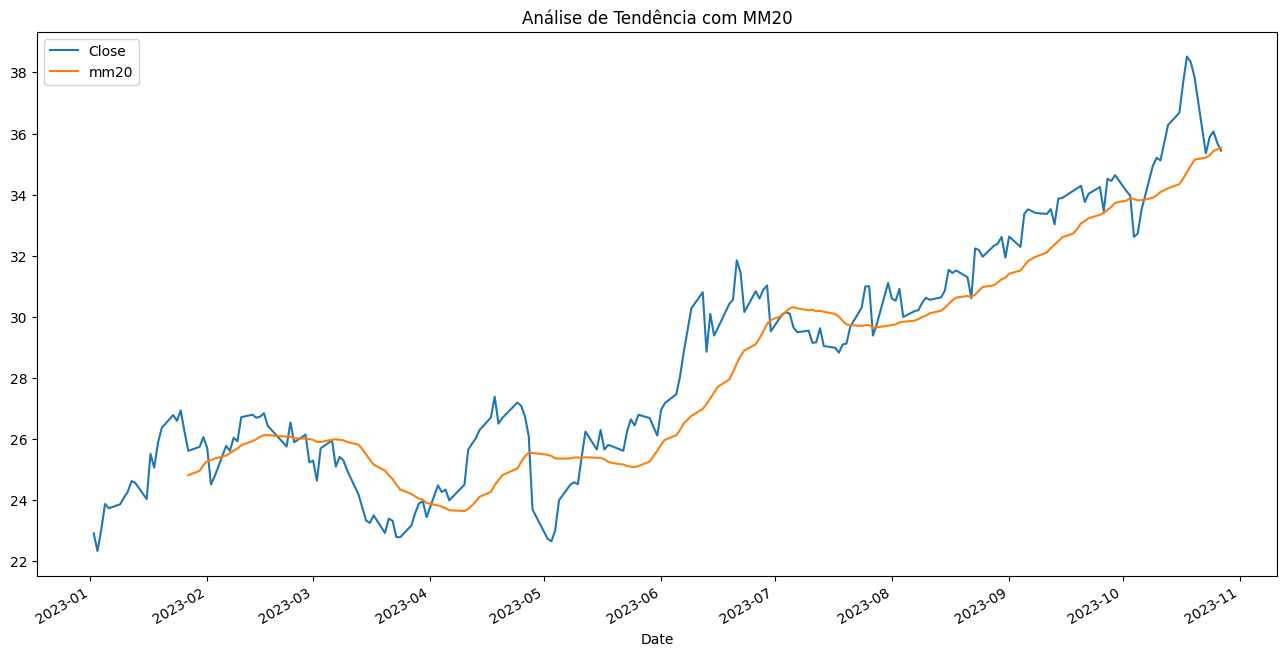

In [10]:
# Médias Móveis
# Criando coluna para calcular e armazenar a média móvel.
df_cotacoes_petro['mm20'] = df_cotacoes_petro['Close'].rolling(20).mean()
df_cotacoes_itau['mm20'] = df_cotacoes_itau['Close'].rolling(20).mean()
df_cotacoes_bb['mm20'] = df_cotacoes_bb['Close'].rolling(20).mean()
df_cotacoes_bradesco['mm20'] = df_cotacoes_bradesco['Close'].rolling(20).mean()

df_cotacoes_petro[['Close', 'mm20']].plot(legend=True, label='Petro', figsize = (16, 8))
plt.title("Análise de Tendência com MM20")

Text(0.5, 1.0, 'Análise de Variação no Preço')

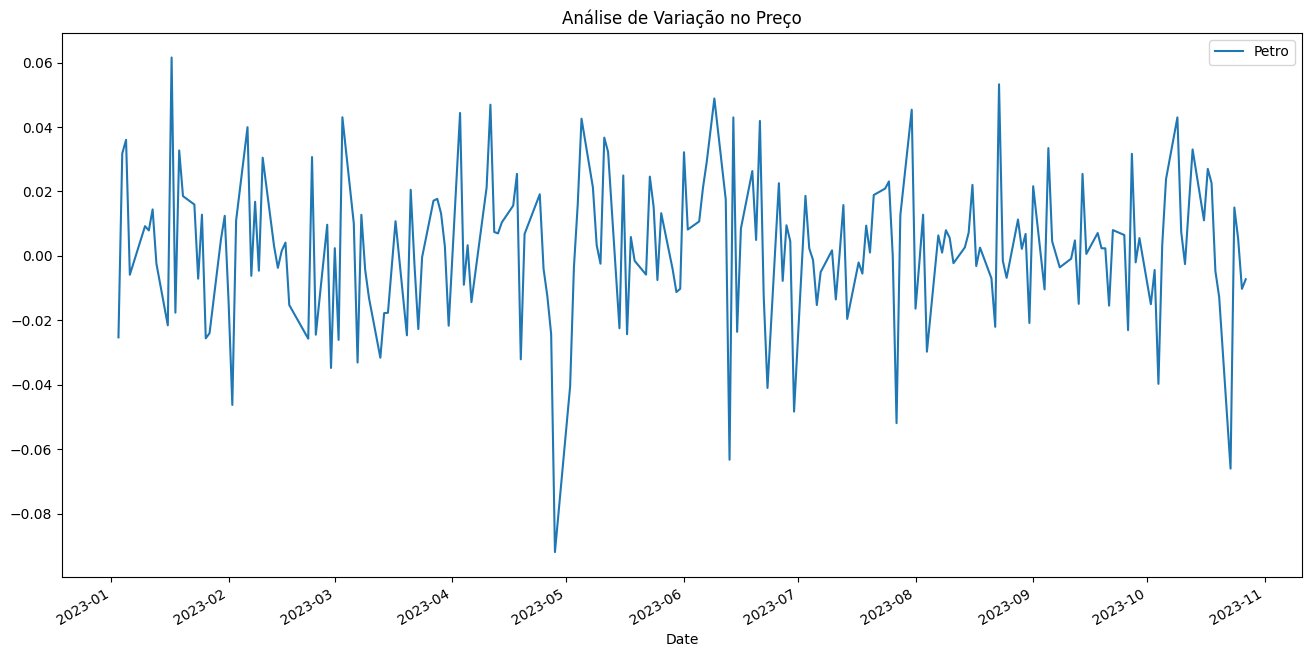

In [11]:
# Variação diária no preço
# Criando coluna para calcular e armazenar a variação.
df_cotacoes_petro['variacao_diaria'] = df_cotacoes_petro['Close'].pct_change()
df_cotacoes_itau['variacao_diaria'] = df_cotacoes_itau['Close'].pct_change()
df_cotacoes_bb['variacao_diaria'] = df_cotacoes_bb['Close'].pct_change()
df_cotacoes_bradesco['variacao_diaria'] = df_cotacoes_bradesco['Close'].pct_change()

df_cotacoes_petro['variacao_diaria'].plot(legend=True, label='Petro', figsize = (16, 8))
plt.title("Análise de Variação no Preço")

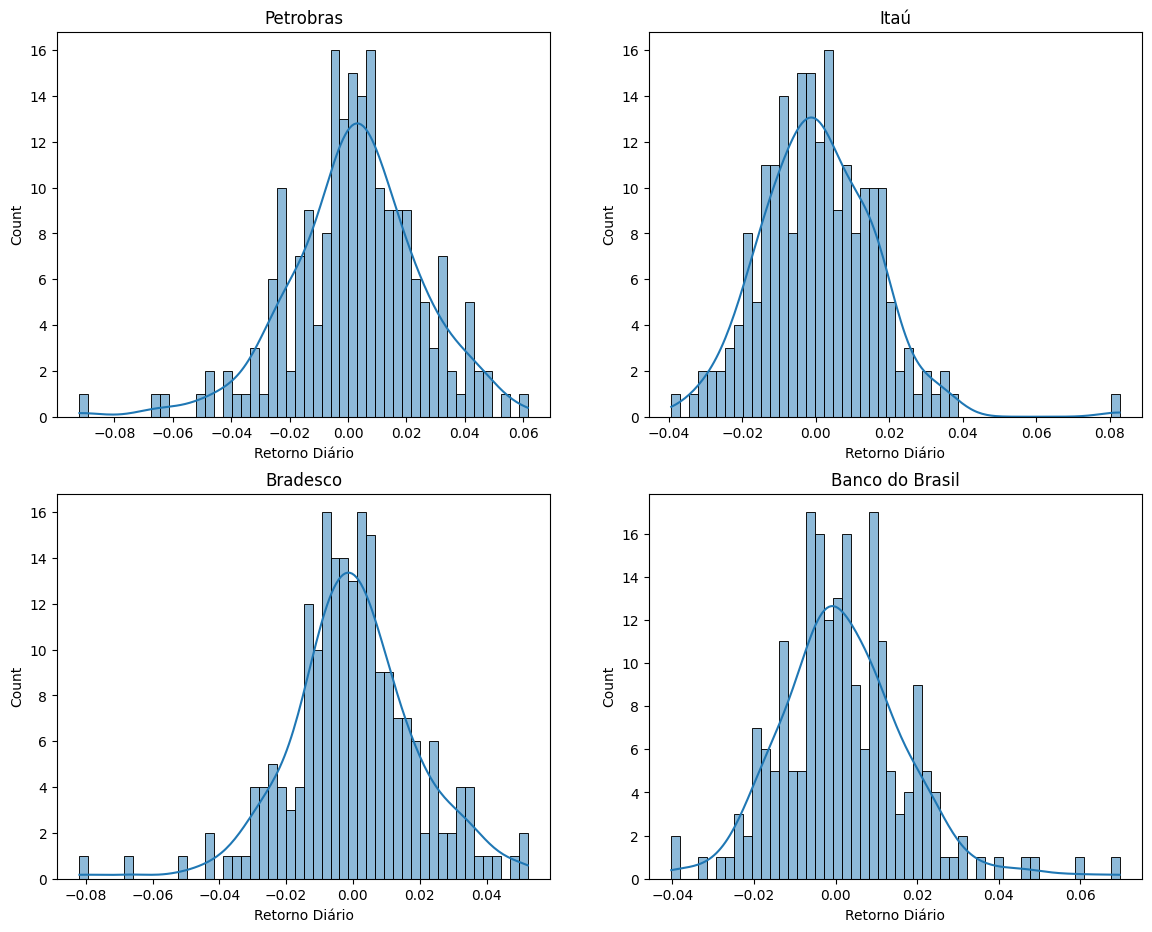

In [12]:
# Análise de Distribuição
fig, axes = plt.subplots(2, 2, figsize = (14, 11))
#fig.suptitle('Probabilidade de Retorno')

grafico = sns.histplot(df_cotacoes_petro['variacao_diaria'], bins=50, kde = True, ax = axes[0,0])
grafico.set(xlabel='Retorno Diário', title='Petrobras')
grafico = sns.histplot(df_cotacoes_itau['variacao_diaria'], bins=50, kde = True, ax = axes[0,1])
grafico.set(xlabel='Retorno Diário', title='Itaú')
grafico = sns.histplot(df_cotacoes_bradesco['variacao_diaria'], bins=50, kde = True, ax = axes[1,0])
grafico.set(xlabel='Retorno Diário', title='Bradesco')
grafico = sns.histplot(df_cotacoes_bb['variacao_diaria'], bins=50, kde = True, ax = axes[1,1])
grafico.set(xlabel='Retorno Diário', title='Banco do Brasil')

plt.show()


No gráfico acima observamos que os valores dentro da normalidade estão compreendidos abaixo da linha azul (curva normal) de cada gráfico.
Já os valores muito extremos (distantes da curva normal) podem ser "outliers", ou seja, dados discrepantes.

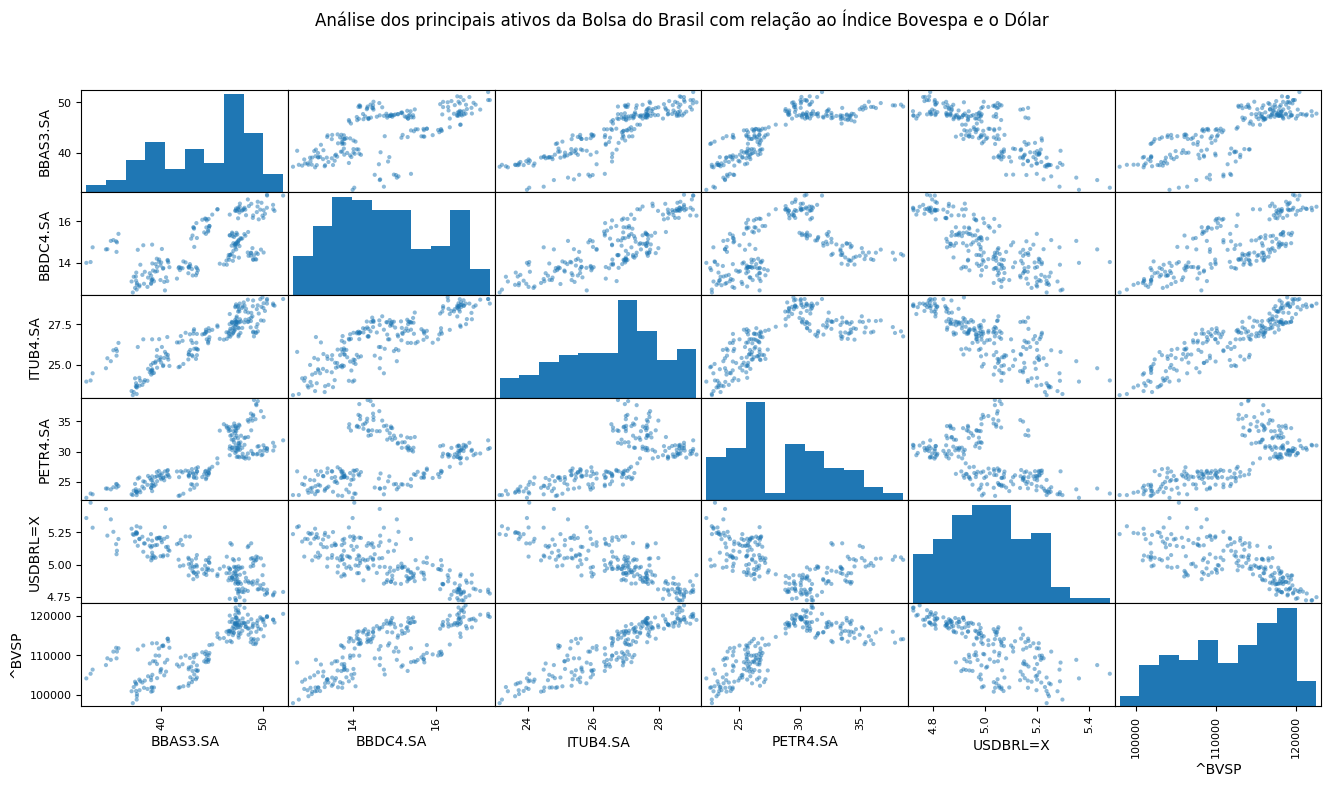

In [13]:
# Gráfico: Matriz de Dispersão
# - Na diagonal é possível ver a variação de preços de cada ativo.
# - Fora da diagonal é possível ver como as ações se correlacionam entre si.
from pandas.plotting import scatter_matrix
grafico = scatter_matrix(df_cotacoes['Close'], figsize = (16, 8))
plt.suptitle('Análise dos principais ativos da Bolsa do Brasil com relação ao Índice Bovespa e o Dólar')
plt.show()

In [14]:
# Verificando a correlação entre os ativos.
df_cotacoes['Close'].corr().style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,BBAS3.SA,BBDC4.SA,ITUB4.SA,PETR4.SA,USDBRL=X,^BVSP
BBAS3.SA,1.000000,0.644572,0.877363,0.825325,-0.807089,0.791889
BBDC4.SA,0.644572,1.000000,0.832403,0.331237,-0.748707,0.763680
ITUB4.SA,0.877363,0.832403,1.000000,0.683240,-0.798409,0.901072
PETR4.SA,0.825325,0.331237,0.683240,1.000000,-0.499790,0.745471
USDBRL=X,-0.807089,-0.748707,-0.798409,-0.499790,1.000000,-0.715686
^BVSP,0.791889,0.763680,0.901072,0.745471,-0.715686,1.000000


Resultados da Análise:

1. Analisando a tabela acima, observamos uma correlação positiva muito forte (acima de 0.9) entre o Índice Bovespa (BVSP) e o Itaú (ITUB4.SA), o que indica que altas nas ações do Itaú podem sugerir altas também no Índice Bovespa.

2. Podemos observar também correlações positivas fortes (entre 0.7 e 0.9) entre o Índice Bovespa (BVSP) e Petrobras (PETR4.SA), Bradesco (BBDC4.SA) e BB (BBAS3.SA), sugerindo que a alta em qualquer um dos últimos 3 ativos pode levar a altas no Índice Bovespa.

3. Pode-se verificar também uma correlação negativa forte (menor que -0.9) entre o Índice Bovespa, as ações das empresas (Itaú, Bradesco e BB) e o dólar. É possível observar que altas na cotação do dólar levam à quedas nas cotações tanto do Índice Bovespa quanto das ações das empresas citadas. Por outro lado, quedas no dólar podem gerar altas tanto no Índice quanto nas empresa.

Obs: as classificações das correlações foram realizadas de acordo com o "Coeficiente de correlação de Pearson".


In [15]:
# Análise Risco X Retorno
retorno_petro = df_cotacoes_petro.variacao_diaria.mean()
risco_petro = df_cotacoes_petro.variacao_diaria.std()

retorno_itau = df_cotacoes_itau.variacao_diaria.mean()
risco_itau = df_cotacoes_itau.variacao_diaria.std()

retorno_bradesco = df_cotacoes_bradesco.variacao_diaria.mean()
risco_bradesco = df_cotacoes_bradesco.variacao_diaria.std()

retorno_bb = df_cotacoes_bb.variacao_diaria.mean()
risco_bb = df_cotacoes_bb.variacao_diaria.std()

print(retorno_bb, risco_bb)


0.0019844890220552737 0.015709130447626698


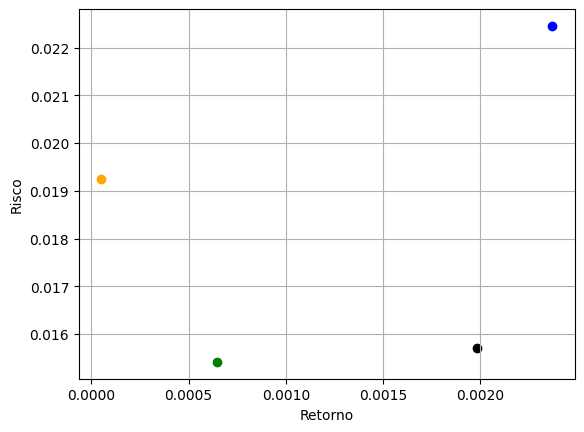

In [16]:
plt.grid()
plt.xlabel('Retorno')
plt.ylabel('Risco')
plt.scatter(retorno_petro, risco_petro, color='blue')
plt.scatter(retorno_itau, risco_itau, color='green')
plt.scatter(retorno_bradesco, risco_bradesco, color='orange')
plt.scatter(retorno_bb, risco_bb, color='black')


Resultado da Análise:

De acordo com o gráfico acima, percebemos que Itaú (verde) e BB (preto) são os melhores ativos para se investir, pois apresentam o menores riscos e o maiores retornos.